I'll use this notebook to study potential LJ constituents and look into whether I can unambiguously pick out the relevant particles with dR requirements. This study should be updated to instead use pfjet.pfcand and compare directly with ljsources.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
#from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

Start by looking at default 2mu2e sample with 2mu2e selection and matched dark photons.

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
hists = output["out"]["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]

Output()

Output()

First add basic pf e, pf mu, pf photon, and dsa mu hists

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee2ba4700>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

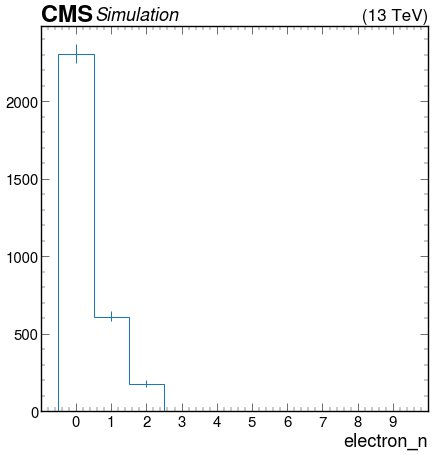

In [4]:
utilities.plot(hists["electron_n"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee2dc5dc0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

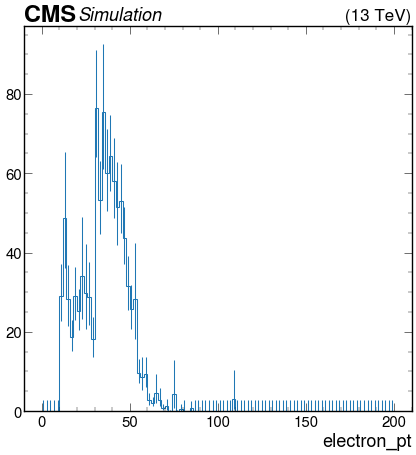

In [5]:
utilities.plot(hists["electron_pt"]["2mu2e_matchedLj", :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f82b0c85700>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f82b0ccab50>, text=[])

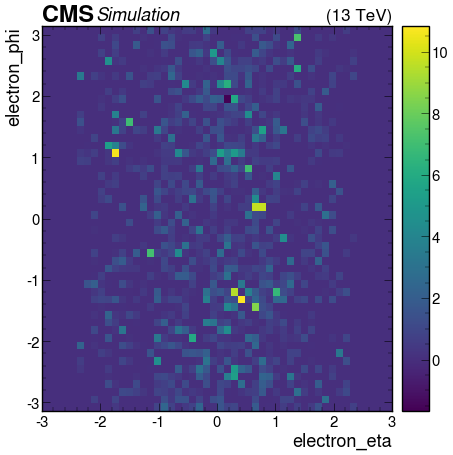

In [6]:
utilities.plot(hists["electron_eta_phi"]["2mu2e_matchedLj", :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f82b0a8df40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

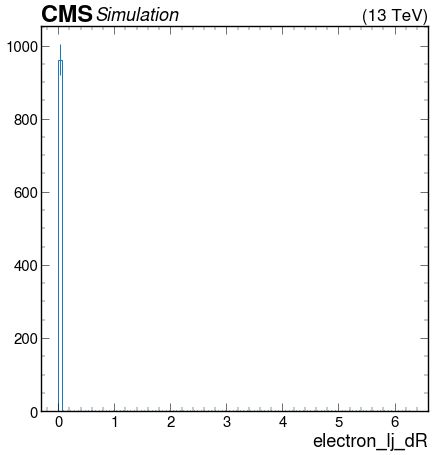

In [7]:
utilities.plot(hists["electron_lj_dR"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f82b090b190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

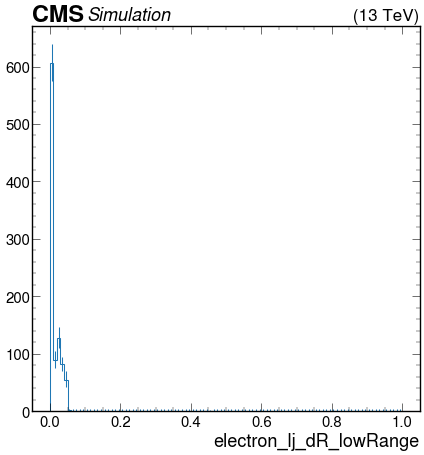

In [8]:
utilities.plot(hists["electron_lj_dR_lowRange"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee08cea30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

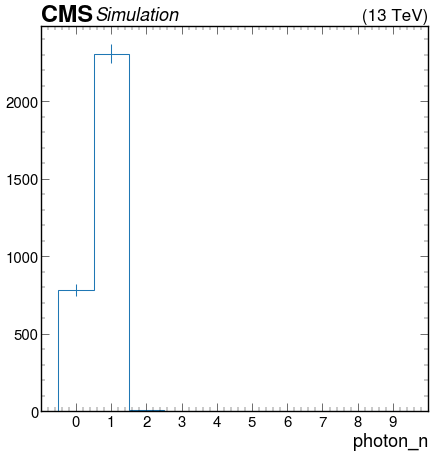

In [9]:
utilities.plot(hists["photon_n"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee2a8cdf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

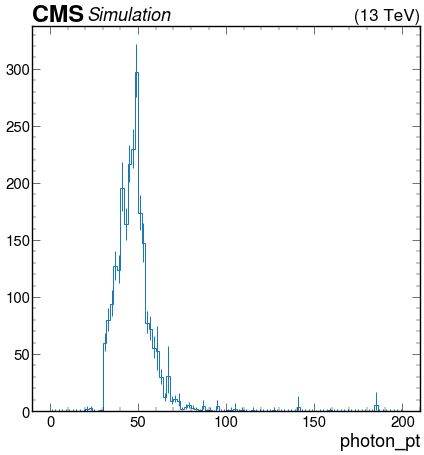

In [10]:
utilities.plot(hists["photon_pt"]["2mu2e_matchedLj", :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7ee06734f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7ee067e550>, text=[])

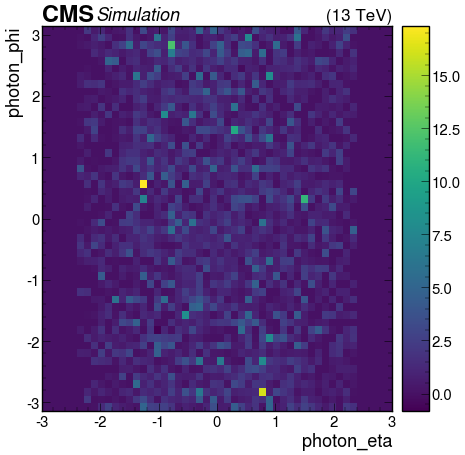

In [11]:
utilities.plot(hists["photon_eta_phi"]["2mu2e_matchedLj", :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee037c820>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

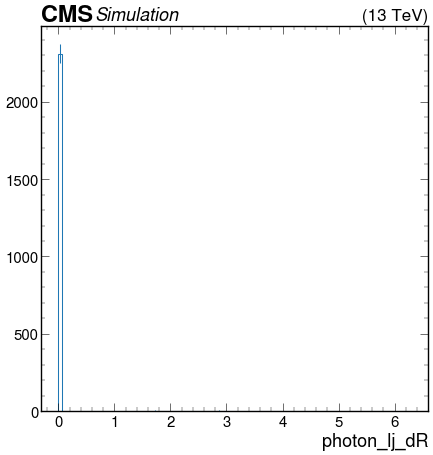

In [12]:
utilities.plot(hists["photon_lj_dR"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee026de20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

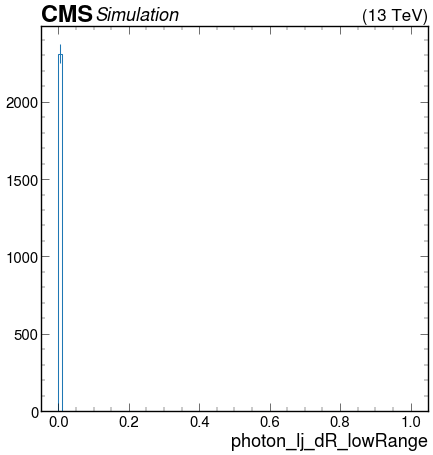

In [13]:
utilities.plot(hists["photon_lj_dR_lowRange"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee0130f40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

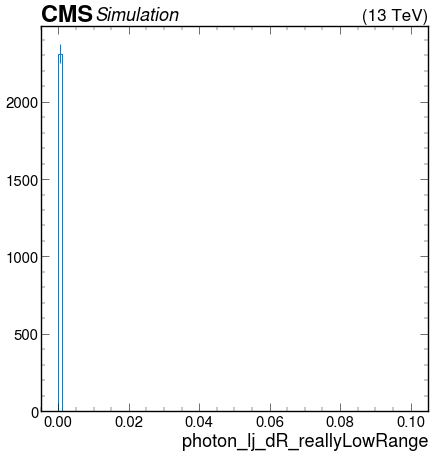

In [14]:
utilities.plot(hists["photon_lj_dR_reallyLowRange"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ee033c0a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

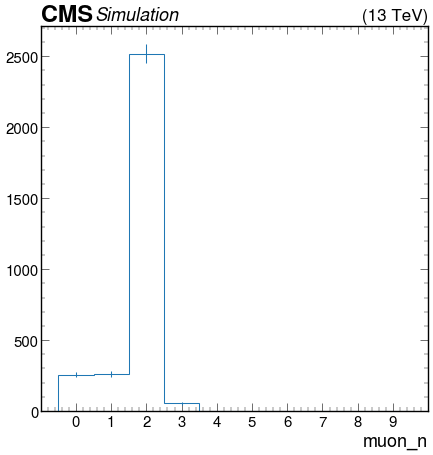

In [15]:
utilities.plot(hists["muon_n"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edbdf9af0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

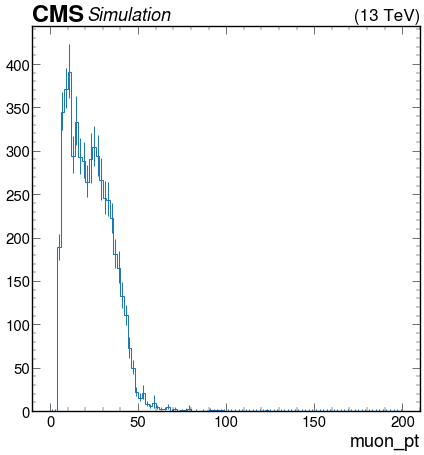

In [16]:
utilities.plot(hists["muon_pt"]["2mu2e_matchedLj", :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7edbfec2e0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7edbc18d60>, text=[])

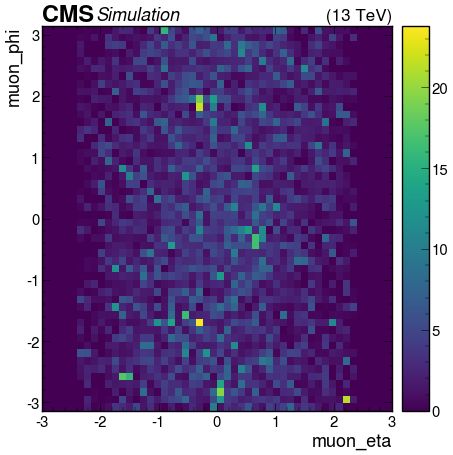

In [17]:
utilities.plot(hists["muon_eta_phi"]["2mu2e_matchedLj", :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edbbe82b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

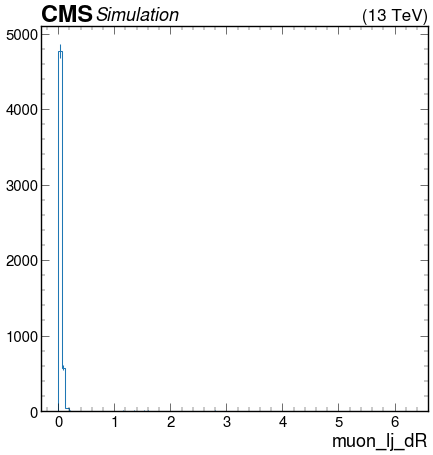

In [18]:
utilities.plot(hists["muon_lj_dR"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edb8ef580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

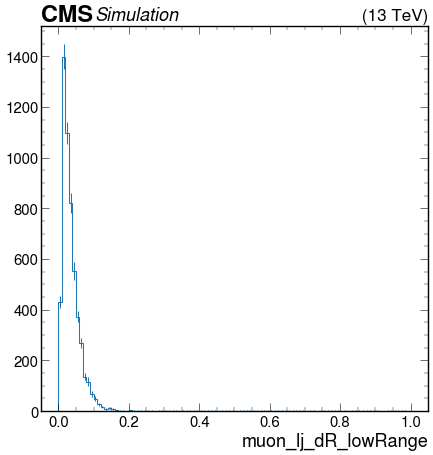

In [19]:
utilities.plot(hists["muon_lj_dR_lowRange"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edb74c730>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

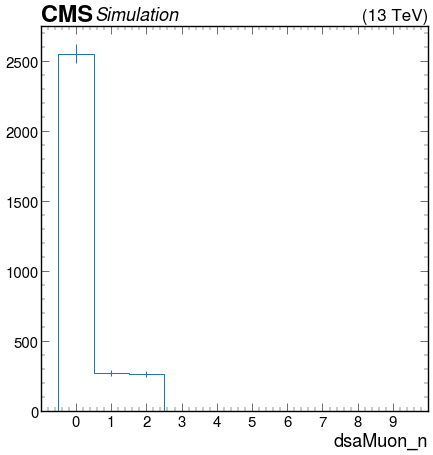

In [20]:
utilities.plot(hists["dsaMuon_n"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edb61a340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

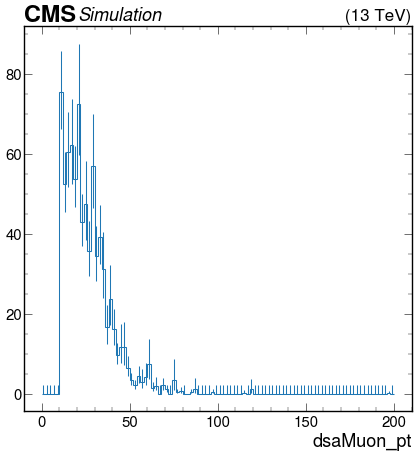

In [21]:
utilities.plot(hists["dsaMuon_pt"]["2mu2e_matchedLj", :])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f82b0cca850>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7edb4c7f40>, text=[])

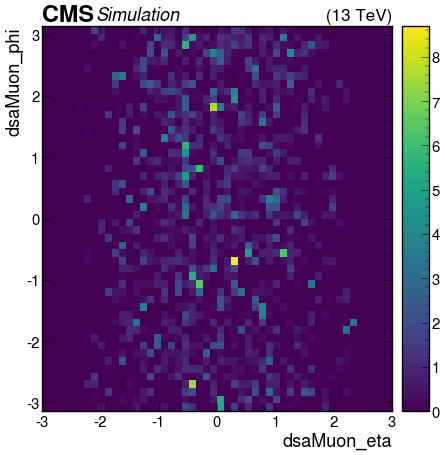

In [22]:
utilities.plot(hists["dsaMuon_eta_phi"]["2mu2e_matchedLj", :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edb2b7130>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

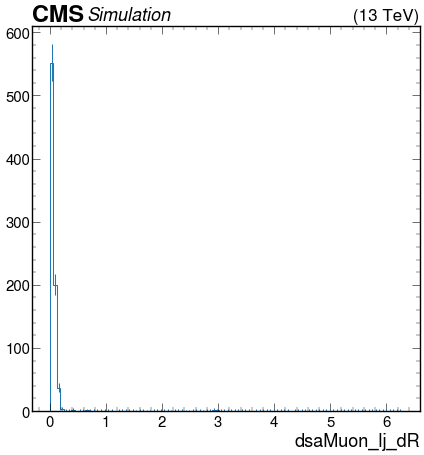

In [23]:
utilities.plot(hists["dsaMuon_lj_dR"]["2mu2e_matchedLj", :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edb46bee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

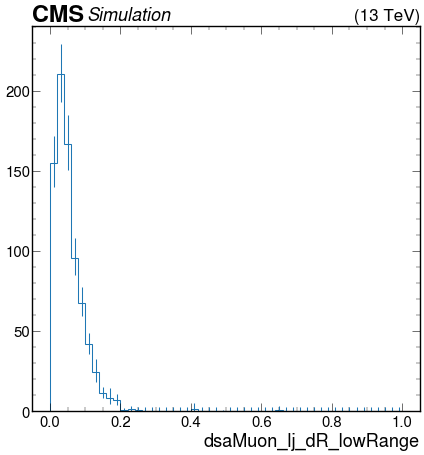

In [24]:
utilities.plot(hists["dsaMuon_lj_dR_lowRange"]["2mu2e_matchedLj", :])

The photon hists in particular are interesting in that photon pT tends to ~= dark photon pT and dR(photon, LJ) tends to be exactly 0. I guess it makes sense that the majority of LJs whose constituents include photons are just a single reco photon from the dark photon decaying to two nearby electrons in ECAL. We've seen in the lj_resolution notebook that photon LJs appear to have much better pT resolution -- perhaps this is the cause.

Next, I would be interested in looking at the following:
- these same distributions after filtering the collections with pT, id, eta, and dR(LJ) criteria to only include potential LJ constituents
- which particles LJs tend to be composed of (is it more or less always 2 mu, 2 e, or 1 photon, or are more complicated combinations possible/frequent?)
- can I successfully match the reco e, mu, and photons with the gen dark photon daughters?
- do LJs sometimes miss some of the gen dark photon daughters?